<a href="https://colab.research.google.com/github/noctillion/models/blob/master/interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 **Exploratory data analysis (EDA)**

**1) Install and load required packages**

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


%matplotlib inline
plt.style.use('bmh')

In [2]:
## Load data
pathx= '/content/drive/MyDrive/explore/interview_dataset/X.npy'
pathy = '/content/drive/MyDrive/explore/interview_dataset/y.npy'
X= np.load(pathx)
y = np.load(pathy)
# Create the dataframe
dfX = pd.DataFrame(X)
dfy = pd.DataFrame(y)
dfy.columns =['target']
#dfy['target'] = dfy.target.astype('category')

In [3]:
# Separate into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
            dfX, dfy, test_size=0.3, random_state=42, stratify=dfy)

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, type(X_train)

((49, 50), (21, 50), (49, 1), (21, 1), pandas.core.frame.DataFrame)

In [5]:
dfT = pd.concat([dfX, dfy],axis = 1)

In [6]:
dfT.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,target
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,0.012378,-0.128069,0.006768,0.138074,0.226504,-0.006839,-0.154490,-0.055032,0.004453,0.017229,-0.186859,0.008848,0.113670,0.077045,-0.367940,0.043404,0.672021,0.070398,-0.008574,-0.055149,-0.055168,-0.095474,0.064362,0.167904,-0.223027,-0.044496,0.006388,0.069179,0.066802,-0.038970,-0.329424,-0.133607,0.268460,-0.260137,-0.030579,-0.163273,0.570368,-0.007111,0.237506,0.273988,0.197679,0.239241,0.035829,-0.217671,-0.221113,0.103745,0.384357,-0.088869,-0.066278,0.079413,1.542857
std,1.045701,0.996278,1.742830,0.928008,0.933220,1.052036,1.105215,1.211515,1.082021,0.805119,1.011978,1.103313,1.034402,0.836675,0.924049,0.941169,3.202804,0.915240,1.973674,1.008491,1.031552,0.951901,1.958922,0.892963,1.047437,1.018901,0.957285,0.951544,0.956577,0.987878,1.862672,0.966796,1.733569,0.826599,0.971542,1.031420,1.991812,0.952132,2.042281,0.910834,0.885330,1.072745,2.249277,3.210677,0.979283,0.978517,2.724915,0.846423,1.071505,1.163333,1.085954
min,-1.885956,-2.823085,-4.405629,-1.785782,-1.636920,-3.175686,-2.234492,-2.585718,-2.656456,-2.041966,-2.260247,-2.041045,-2.351969,-1.665118,-2.811108,-2.124055,-5.039117,-1.676886,-5.316045,-2.508146,-2.558453,-2.196035,-7.560455,-2.004974,-2.718233,-2.030104,-2.227420,-2.262614,-2.513748,-2.582447,-4.414801,-2.248398,-4.260276,-2.454251,-2.592021,-2.622062,-5.257915,-2.342072,-4.260266,-1.297973,-1.824571,-2.314608,-4.741214,-7.602884,-2.988733,-2.989933,-4.179233,-1.854201,-3.106373,-2.335250,0.000000
25%,-0.670175,-0.820020,-1.370624,-0.568578,-0.286586,-0.590236,-0.895224,-0.625269,-0.754856,-0.548845,-0.986392,-0.802569,-0.508603,-0.584623,-0.988811,-0.518395,-1.113998,-0.552243,-1.260031,-0.750916,-0.659938,-0.663939,-0.800323,-0.384185,-1.027526,-0.790471,-0.536683,-0.556360,-0.589590,-0.715897,-1.470155,-0.880943,-1.019797,-0.810153,-0.702305,-0.778152,-0.957337,-0.543827,-1.150592,-0.402787,-0.564023,-0.598473,-1.525425,-2.493212,-0.815791,-0.511280,-1.770461,-0.694851,-0.721850,-0.787483,1.000000
50%,-0.070540,-0.089650,-0.101233,0.114163,0.344741,0.252990,-0.292184,-0.196670,0.100865,0.105791,-0.203601,0.046730,0.149269,0.237026,-0.243534,0.032075,0.185567,0.034722,-0.229413,0.055613,-0.049853,-0.003088,0.022949,0.199109,-0.164727,-0.148649,-0.063700,-0.071610,0.137629,-0.036571,-0.621181,-0.229903,0.249096,-0.233062,-0.046255,-0.170194,0.562912,0.094104,0.539074,0.159660,0.154319,0.299161,0.007024,-0.044341,-0.210669,0.052753,0.293541,-0.150597,-0.074531,0.178462,2.000000
75%,0.724225,0.442334,1.398535,0.704774,0.713713,0.688653,0.562230,0.913916,0.747082,0.558059,0.463198,0.854284,0.582980,0.654075,0.226715,0.632554,2.464464,0.716648,1.198514,0.611921,0.588306,0.547120,1.341859,0.783543,0.413250,0.770022,0.496065,0.807971,0.715587,0.649080,0.781616,0.480592,1.699015,0.282376,0.470916,0.496221,2.039452,0.558147,1.483688,0.847504,0.946260,1.117443,1.519133,1.832969,0.386026,0.710492,2.357511,0.579616,0.683057,0.879396,2.000000
max,2.400879,2.375163,4.333903,2.148156,2.858587,1.816112,2.896131,2.239029,2.215426,1.486687,1.982139,3.089559,2.713152,1.563436,1.844160,1.911120,8.030451,2.614693,4.586068,2.732765,2.301967,1.628816,4.476260,2.144445,2.217318,2.062886,2.785435,2.085644,2.423127,2.126019,4.765504,2.351769,3.622186,2.461796,2.211859,2.038507,4.297513,2.241843,5.270575,2.921092,2.028850,2.322867,5.536612,5.938012,2.975061,2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Target absolute frequency')

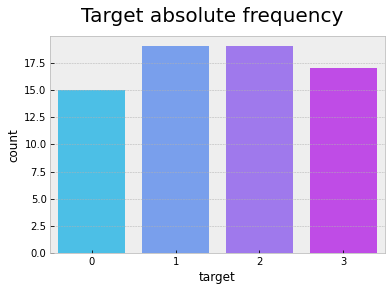

In [7]:
## Count by class
fig = plt.figure()
sns.countplot(dfT['target'], palette='cool')
fig.suptitle('Target absolute frequency', fontsize=20)
#plt.xlabel('Features', fontsize=18)
#plt.ylabel('Suport', fontsize=16)


Small dataset of 70 entries and 50 features. Four classes with balanced data. Without NAs

In [8]:
df_num_corr = dfT.corr()['target'][:-1] 
g_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} correlated variable with target:\n{}".format(len(g_features_list), g_features_list))

There is 1 correlated variable with target:
22   -0.504938
Name: target, dtype: float64


In [9]:
# Function for histogram, Q-Q and Boxplot. 

def diagnostic_plots(dfT, variable, target=False):
    # Receives a dataframe (df) and variable of interest
    plt.figure(figsize=(16, 4))
    
    if target == True:
      df = dfT.drop(['target'], axis = 1)
      gnum = 4

    if target == False:
      df = dfT
      gnum = 3
      
    # histogram
    plt.subplot(1, gnum, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    #  Q-Q 
    plt.subplot(1, gnum, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Cuantiles de la variable')

    # boxplot
    plt.subplot(1, gnum, 3)
    sns.boxplot(y=df[variable])
    plt.title('Gráfico de caja')

    ###  Pairplot 
    if target == True:
      #plt.figure(figsize=(16, 4))
      #plt.subplot(1, gnum, 4)
      sns.pairplot(data=dfT,
                 x_vars=variable,
                 y_vars=['target'])
      plt.title('Pairplot')


    plt.show()

In [10]:
# for Q-Q 
import scipy.stats as stats

In [11]:
#diagnostic_plots(dfT, 4, target=True)

In [12]:
# Outliers detection IQR 
def find_skewed_boundaries(df, variable, distance):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return variable, upper_boundary, lower_boundary

In [13]:
counter = 0
features_out= []
for i in range(len(dfT.drop(['target'], axis = 1).columns)):
  i, RM_upper_limit, RM_lower_limit = find_skewed_boundaries(dfT.drop(['target'], axis = 1), i, 1.5)
  outliers_RM = np.where(dfT.drop(['target'], axis = 1)[i] > RM_upper_limit, True,
                       np.where(dfT.drop(['target'], axis = 1)[i] < RM_lower_limit, True, False))
  if np.any(outliers_RM == True):
    counter = counter + 1
    features_out.append(i)
    print(i,RM_upper_limit, RM_lower_limit)
    #diagnostic_plots(dfT, i, target=True)
    #print(i, outliers_RM)


1 2.3358652356708864 -2.713550626363536
4 2.2141603666667256 -1.7870335390781895
5 2.606986912093247 -2.508569124423281
6 2.7484101306402433 -3.0814043303039287
12 2.2203536425898966 -2.145976271219086
16 7.83215660530465 -6.481690616578994
18 4.886331371109525 -4.947848786892634
19 2.6561775843537077 -2.795172735817199
20 2.4606725890974834 -2.532303897562936
22 4.555132753987218 -4.013596726173933
26 2.0451876470583374 -2.085805456476415
30 4.159273070655502 -4.847811524959178
33 1.9211693596690824 -2.4489462530326684
34 2.230747257361696 -2.4621364802998786
37 2.2111089638686217 -2.1967888089430083
39 2.722941012538057 -2.2782241862413097
44 2.1887501354794074 -2.618514926519144
45 2.5431502368344447 -2.3439377525514615
48 2.790417273234735 -2.829210309774459


In [14]:
print("percentage of features with outliers:", counter*100/len(dfT.drop(['target'], axis = 1).columns),"%")

percentage of features with outliers: 38.0 %


In [15]:
features_out

[1, 4, 5, 6, 12, 16, 18, 19, 20, 22, 26, 30, 33, 34, 37, 39, 44, 45, 48]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


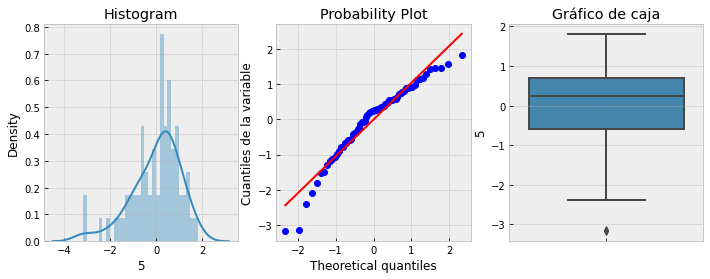

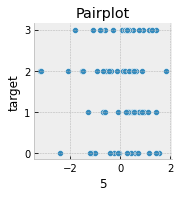

In [16]:
diagnostic_plots(dfT, 5, target=True)

In [17]:
pip install feature-engine

In [18]:
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer

After diagnostic using histogram, QQ plot, and boxplot. 38% of features showed outliers IQR 0.75, 0.25. 
Features with outliers: 1, 4, 5, 6, 12, 16, 18, 19, 20, 22, 26, 30, 33, 34, 37, 39, 44, 45, 48

In [19]:
from feature_engine.outliers import Winsorizer
## remove outliers using iqr
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5)
winsorizer.fit(dfX)
dfX_t = winsorizer.transform(dfX)


##

In [20]:
X_train_t = winsorizer.transform(X_train)
X_test_t = winsorizer.transform(X_test)

**Effect of normalization**

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
# set up the scaler
scaler = StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# let's transform the returned NumPy arrays to dataframes 

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
type(X_train_scaled),type(X_test_scaled)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

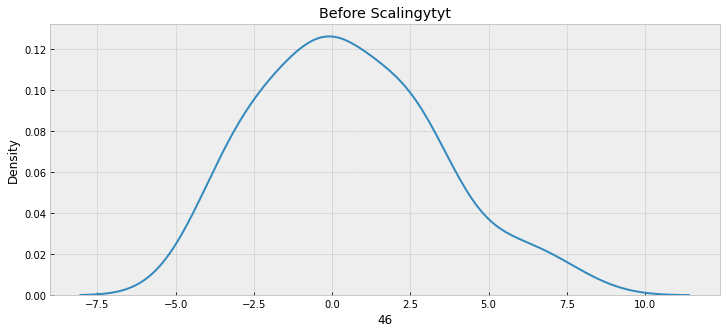

In [24]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(12, 5))
aGraph=[46]
ax1.set_title('Before Scalingytyt')
for i in aGraph:
  sns.kdeplot(X_train[i], ax=ax1)
plt.show()

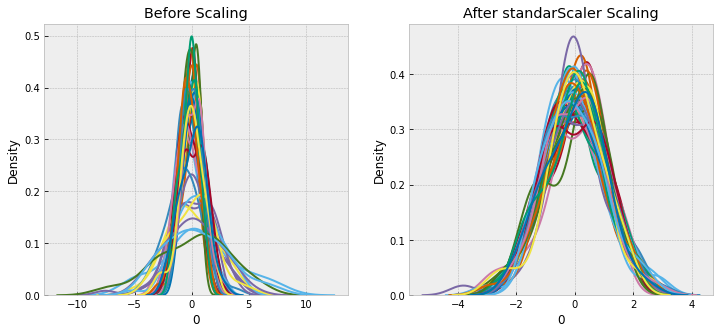

In [25]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
for i in range(len(X_train.columns)):
  sns.kdeplot(X_train[i], ax=ax1)

# after scaling
ax2.set_title('After standarScaler Scaling')
for i in range(len(X_train_scaled.columns)):
  sns.kdeplot(X_train_scaled[i], ax=ax2)
plt.show()

**Feature selection**
The objective in this section is to evaluate the relative importance of the features. Given the number of features we will determine which of the features could be removed


*   Correlated features
*   Information Gain method
*   kbest method
*   Boruta method


In [26]:
def custCorrelation(dataset, threshold):
  col_corr= set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j])> threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [27]:
custCorrelation(X_train_scaled, 0.7)

{42, 46}

Features 42 and 46 had a positive correlation of 0.69. Strong correlations are not evidenced in the features

In [28]:
## Features Using Information Gain For Classification

In [29]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train_scaled, y_train)
#mutual_info

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
mutual_info = pd.Series(mutual_info)
mutual_info.index= X_train_scaled.columns
#mutual_info.sort_values(ascending=False)

Text(0, 0.5, 'Support')

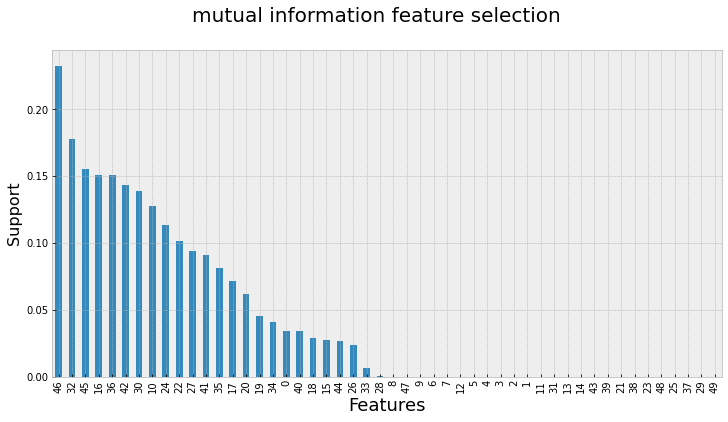

In [31]:
fig = plt.figure()
mutual_info.sort_values(ascending=False).plot.bar(figsize=(12,6))
fig.suptitle('mutual information feature selection', fontsize=20)
plt.xlabel('Features', fontsize=18)
plt.ylabel('Support', fontsize=16)


In [32]:
from sklearn.feature_selection import SelectKBest

In [33]:
sel_nro_cols = SelectKBest(mutual_info_classif, k=5)
sel_nro_cols.fit(X_train_scaled.fillna(0),y_train)
X_train_scaled.columns[sel_nro_cols.get_support()]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Int64Index([16, 32, 36, 45, 46], dtype='int64')

In [34]:
kbest= X_train_scaled.columns[sel_nro_cols.get_support()].sort_values(ascending=False)

In [35]:
kbest

Int64Index([46, 45, 36, 32, 16], dtype='int64')

In [36]:
## feature importance

In [37]:
from sklearn.ensemble import ExtraTreesClassifier


In [38]:
model=ExtraTreesClassifier()
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [39]:
#print(model.feature_importances_)

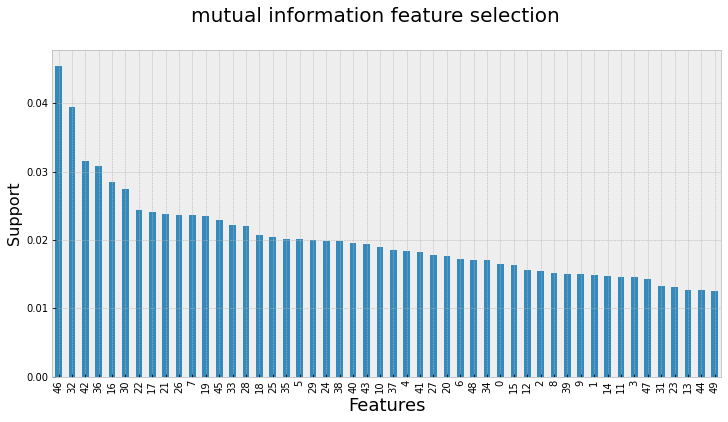

In [40]:
ranked_features= pd.Series(model.feature_importances_, index=X_train_scaled.columns)
impFeat= ranked_features.nlargest(5).index


fig = plt.figure()
ranked_features.sort_values(ascending=False).plot.bar(figsize=(12,6))
fig.suptitle('mutual information feature selection', fontsize=20)
plt.xlabel('Features', fontsize=18)
plt.ylabel('Support', fontsize=16)



plt.show()

In [41]:
impFeat## [46, 36, 32, 22, 42]

Int64Index([46, 32, 42, 36, 16], dtype='int64')

In [42]:
kbest ##[22, 30, 32, 42, 46]

Int64Index([46, 45, 36, 32, 16], dtype='int64')

In [43]:
selectedFeatures=kbest.union(impFeat)

In [44]:
selectedFeatures ##

Int64Index([16, 32, 36, 42, 45, 46], dtype='int64')

In [45]:
pip install Boruta

In [46]:
## boruta
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [47]:
features = [f for f in X_train_scaled.columns]
Xs = X_train_scaled[features].values
Ys = y_train.values.ravel()
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
boruta_feature_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42, max_iter = 50, perc = 90)
boruta_feature_selector.fit(Xs, Ys)
X_filtered = boruta_feature_selector.transform(Xs)
X_filtered.shape
final_features = list()
indexes = np.where(boruta_feature_selector.support_ == True)
for x in np.nditer(indexes):
    final_features.append(features[x])
print(final_features)## [22, 30, 32, 42, 46]

Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	7 / 50
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	8 / 50
Confirmed: 	5
Tentative: 	15
Rejected: 	30
Iteration: 	9 / 50
Confirmed: 	5
Tentative: 	15
Rejected: 	30
Iteration: 	10 / 50
Confirmed: 	5
Tentative: 	15
Rejected: 	30
Iteration: 	11 / 50
Confirmed: 	5
Tentative: 	15
Rejected: 	30
Iteration: 	12 / 50
Confirmed: 	5
Tentative: 	12
Rejected: 	33
Iteration: 	13 / 50
Confirmed: 	5
Tentative: 	12
Rejected: 	33
Iteration: 	14 / 50
Confirmed: 	5
Tentative: 	12
Rejected: 	33
Iteration: 	15 / 50
Confirmed: 	5
Tentative: 	12
Rejected: 	33
Iteration: 	16 / 50
Confirmed: 	5
Tentative: 	11
Rejected: 	34
Iteratio

In [48]:
final_featuresBoruta=  pd.Index(final_features)
final_featuresBoruta

Int64Index([16, 22, 30, 32, 36, 42, 46], dtype='int64')

In [49]:
selectedFeaturesF=final_featuresBoruta.union(selectedFeatures)

In [50]:
selectedFeaturesF

Int64Index([16, 22, 30, 32, 36, 42, 45, 46], dtype='int64')

In [51]:
selectedFeaturesF_J = pd.Index([46, 42, 22, 36, 49])

In [52]:
selectedFeaturesF_J 

Int64Index([46, 42, 22, 36, 49], dtype='int64')

Mutual information [22, 40, 42, 46, 49]
Tree classifier [46, 36, 32, 22, 42]
Boruta [16, 22, 32, 36, 42, 46, 49]

Important features 

*   46, 42, 22
*   36, 49

According to the methods used, the features 46, 42 and 22 are identified as more relevant in the dataset



**Model evaluation**

We will compare five different machine learning Cassification models:

1 - Logistic Regression
2 - K-Nearest Neighbors Classification
3 - Suport Vector Machine
4 - Naive Bayes
5 - Random Forest Classification
6 - SGDClassifier

In [53]:
# # Feature Scaling
#from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train_t)
X_test = sc.transform(X_test_t)

# Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [58]:
#X_trainP = X_train.loc[:,selectedFeaturesF_J] [42,46,22,32][16, 22, 32, 36, 42, 46, 49]
X_trainP = X_train[:,selectedFeaturesF]
X_testP = X_test[:,selectedFeaturesF]

In [56]:
#clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
#models,predictions = clf.fit(X_trainP , X_testP, y_train, y_test)

#models

In [ ]:

# Function to calculate mean absolute error
#def cross_val(X_train, y_train, model):
#    # Applying k-Fold Cross Validation
#    from sklearn.model_selection import cross_val_score
#    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
#    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
#def fit_and_evaluate(model):
    
    # Train the model
#    model.fit(X_train, y_train)
    
    # Make predictions and evalute
#    model_pred = model.predict(X_test)
#    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
#    return model_cross

In [74]:
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

In [75]:

# Function to calculate mean absolute error
def cross_val(X_trainP, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_trainP, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_trainP, y_train)
    
    # Make predictions and evalute
    model_pred, model_prob = model.predict(X_testP), model.predict_proba(X_testP)
    
    model_cross = cross_val(X_trainP, y_train, model)
    y_train_predict  = cross_val_predict(model, X_trainP, y_train)
    confusion_mat = confusion_matrix(y_train, y_train_predict)
    norm_confusion_mat = confusion_mat/confusion_mat.sum(axis =1, keepdims=True)
    np.fill_diagonal(norm_confusion_mat, 0)
    plt.matshow(norm_confusion_mat, cmap= plt.cm.gray)
    plt.title("Normalized confusion matrix", fontweight=4, pad='16')
    plt.show()
    plt.matshow(confusion_mat, cmap= plt.cm.gray)
    plt.title("Confusion matrix", fontweight=4, pad='16')
    plt.show()
    ###Plotting of Train and Test Set in Python
    plt.scatter(y_test,model_pred)
    plt.title("Plotting of Train and Test Set", fontweight=4, pad='16')
    plt.xlabel('True values')
    plt.ylabel('Predictions')
    plt.show()

    sns.heatmap(confusion_mat/np.sum(confusion_mat), annot=True, 
            fmt='.2%', cmap='Blues')

    classification_report= metrics.classification_report(y_test, model_pred, digits=3)
    classification_report2= pd.DataFrame(metrics.classification_report(y_test, model_pred, digits=3, output_dict=True)).transpose()
    #report = classification_report(y_test, model_pred)
    roc_auc = roc_auc_score(y_test, model_prob , multi_class="ovr" )
    #classification_report_csv(classification_report)
    print("confusion matrix")
    print(confusion_mat)
    print("classification report")
    print(classification_report)
    #print(classification_report2)
    print("roc_auc_score ovr", roc_auc )
    #clsf_report = pd.DataFrame(classification_report(y_true = your_y_true, y_pred = your_y_preds5, output_dict=True)).transpose()
    classification_report2.to_csv('Your Classification Report Name.csv', index= True)

    # Return the performance metric
    return model_cross

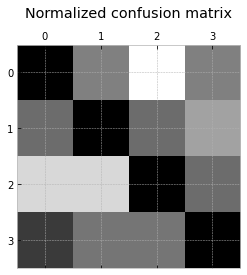

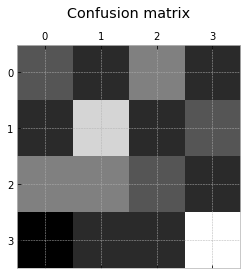

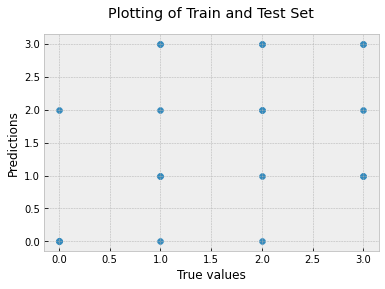

confusion matrix
[[3 2 4 2]
 [2 6 2 3]
 [4 4 3 2]
 [1 2 2 7]]
classification report
              precision    recall  f1-score   support

           0      0.600     0.750     0.667         4
           1      0.400     0.333     0.364         6
           2      0.400     0.333     0.364         6
           3      0.333     0.400     0.364         5

    accuracy                          0.429        21
   macro avg      0.433     0.454     0.439        21
weighted avg      0.422     0.429     0.421        21

roc_auc_score ovr 0.7340073529411764
XGBClassifier Performance on the test set: Cross Validation Score = 0.3889


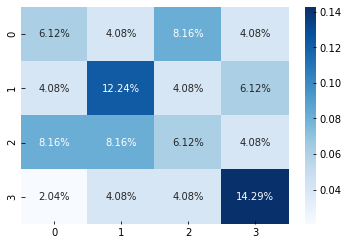

In [76]:

# # XGBClassifier

import xgboost as xgb
xgb_clf = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_cross = fit_and_evaluate(xgb_clf)

print('XGBClassifier Performance on the test set: Cross Validation Score = %0.4f' % xgb_cross)


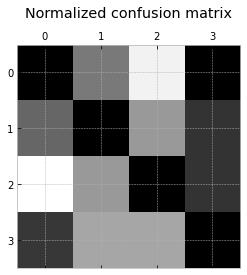

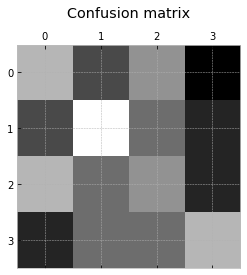

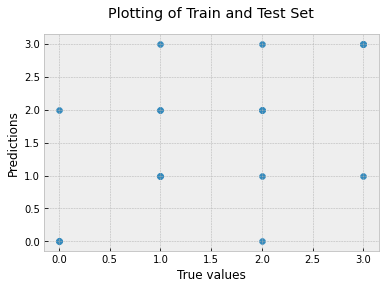

confusion matrix
[[5 2 4 0]
 [2 7 3 1]
 [5 3 4 1]
 [1 3 3 5]]
classification report
              precision    recall  f1-score   support

           0      0.750     0.750     0.750         4
           1      0.600     0.500     0.545         6
           2      0.500     0.500     0.500         6
           3      0.667     0.800     0.727         5

    accuracy                          0.619        21
   macro avg      0.629     0.637     0.631        21
weighted avg      0.616     0.619     0.615        21

roc_auc_score ovr 0.7640522875816992
Naive Bayes Performance on the test set: Cross Validation Score = 0.4267


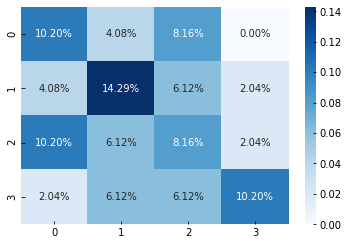

In [77]:
# # Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive_cross = fit_and_evaluate(naive)

print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % naive_cross)

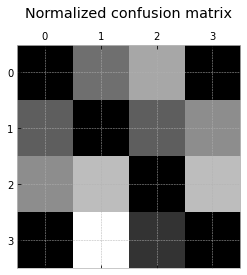

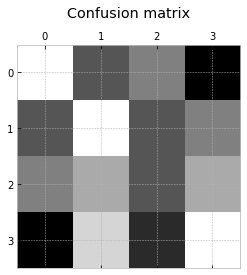

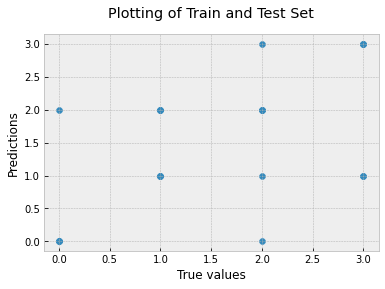

confusion matrix
[[6 2 3 0]
 [2 6 2 3]
 [3 4 2 4]
 [0 5 1 6]]
classification report
              precision    recall  f1-score   support

           0      0.750     0.750     0.750         4
           1      0.500     0.500     0.500         6
           2      0.429     0.500     0.462         6
           3      0.750     0.600     0.667         5

    accuracy                          0.571        21
   macro avg      0.607     0.588     0.595        21
weighted avg      0.587     0.571     0.576        21

roc_auc_score ovr 0.7659313725490196
Random Forest Performance on the test set: Cross Validation Score = 0.3067


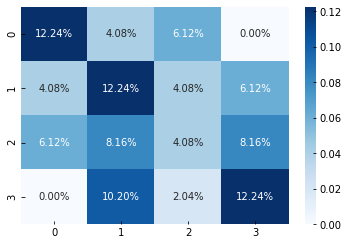

In [78]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

In [ ]:
# # SGDClassifier Classification

#from sklearn.linear_model import SGDClassifier
#sgd_clf = SGDClassifier()
#sgd_cross = fit_and_evaluate(sgd_clf)

#print('SGDClassifier Classification Performance on the test set: Cross Validation Score = %0.4f' % sgd_cross)

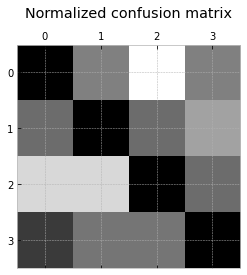

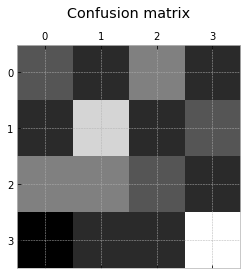

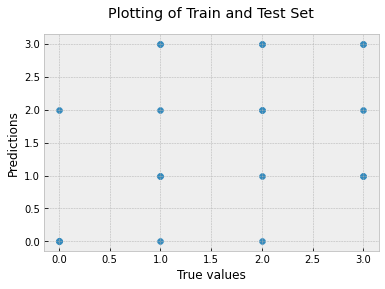

confusion matrix
[[3 2 4 2]
 [2 6 2 3]
 [4 4 3 2]
 [1 2 2 7]]
classification report
              precision    recall  f1-score   support

           0      0.600     0.750     0.667         4
           1      0.400     0.333     0.364         6
           2      0.400     0.333     0.364         6
           3      0.333     0.400     0.364         5

    accuracy                          0.429        21
   macro avg      0.433     0.454     0.439        21
weighted avg      0.422     0.429     0.421        21

roc_auc_score ovr 0.7340073529411764
Gradient Boosting Classification Performance on the test set: Cross Validation Score = 0.3889


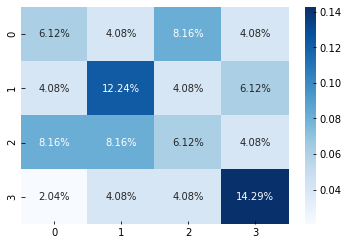

In [79]:
# # Gradient Boosting Classification 
from xgboost import XGBClassifier
gb = XGBClassifier()
gb_cross = fit_and_evaluate(gb)

print('Gradient Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

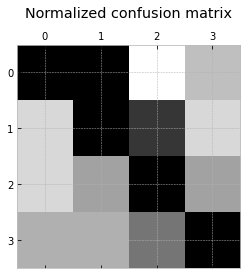

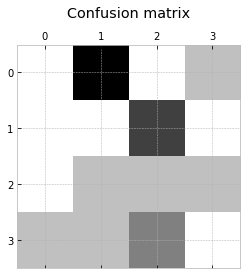

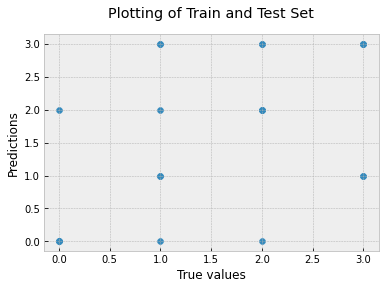

confusion matrix
[[4 0 4 3]
 [4 4 1 4]
 [4 3 3 3]
 [3 3 2 4]]
classification report
              precision    recall  f1-score   support

           0      0.600     0.750     0.667         4
           1      0.500     0.333     0.400         6
           2      0.600     0.500     0.545         6
           3      0.429     0.600     0.500         5

    accuracy                          0.524        21
   macro avg      0.532     0.546     0.528        21
weighted avg      0.531     0.524     0.516        21

roc_auc_score ovr 0.7110089869281047
DecisionTreeClassifier Classification Performance on the test set: Cross Validation Score = 0.3044


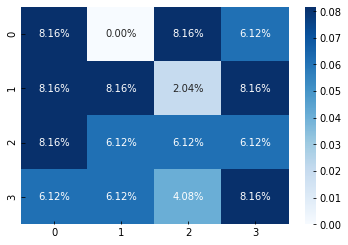

In [80]:
## DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
tree_clf= DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_cross = fit_and_evaluate(tree_clf)

print('DecisionTreeClassifier Classification Performance on the test set: Cross Validation Score = %0.4f' % tree_clf_cross)

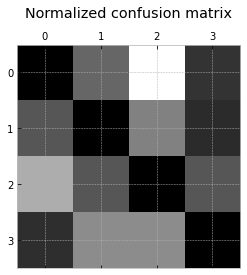

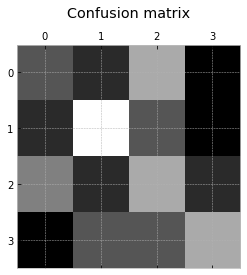

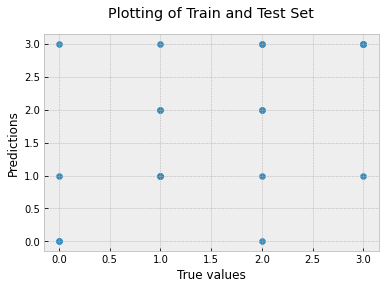

confusion matrix
[[3 2 5 1]
 [2 7 3 1]
 [4 2 5 2]
 [1 3 3 5]]
classification report
              precision    recall  f1-score   support

           0      0.667     0.500     0.571         4
           1      0.500     0.500     0.500         6
           2      0.500     0.333     0.400         6
           3      0.500     0.800     0.615         5

    accuracy                          0.524        21
   macro avg      0.542     0.533     0.522        21
weighted avg      0.532     0.524     0.513        21

roc_auc_score ovr 0.783108660130719
LinearDiscriminantAnalysis Classification Performance on the test set: Cross Validation Score = 0.4067


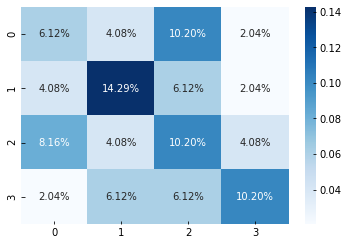

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## LinearDiscriminantAnalysis

LDA_clf= LinearDiscriminantAnalysis()
lda_clf_cross = fit_and_evaluate(LDA_clf)

print('LinearDiscriminantAnalysis Classification Performance on the test set: Cross Validation Score = %0.4f' % lda_clf_cross)

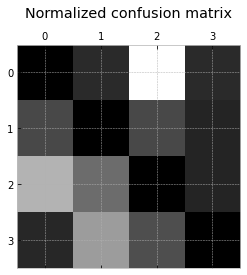

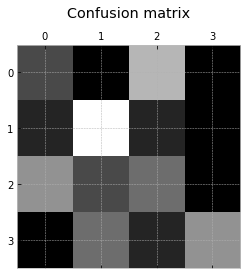

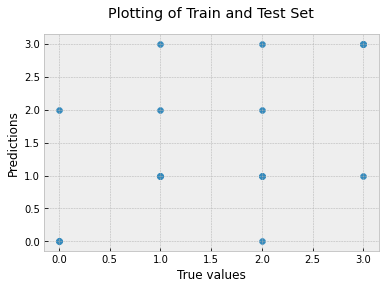

confusion matrix
[[3 1 6 1]
 [2 8 2 1]
 [5 3 4 1]
 [1 4 2 5]]
classification report
              precision    recall  f1-score   support

           0      0.750     0.750     0.750         4
           1      0.500     0.667     0.571         6
           2      0.333     0.167     0.222         6
           3      0.667     0.800     0.727         5

    accuracy                          0.571        21
   macro avg      0.562     0.596     0.568        21
weighted avg      0.540     0.571     0.543        21

roc_auc_score ovr 0.7360906862745098
SVM Classification Performance on the test set: Cross Validation Score = 0.4089


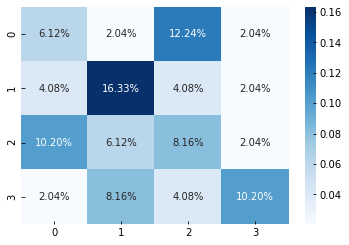

In [93]:

# SVM for multi-class classification using built-in one-vs-one
from sklearn.datasets import make_classification
from sklearn.svm import SVC

SVM_clf= SVC(decision_function_shape='ovo', probability=True )
svm_clf_cross = fit_and_evaluate(SVM_clf)


print('SVM Classification Performance on the test set: Cross Validation Score = %0.4f' % svm_clf_cross)


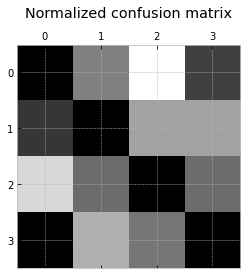

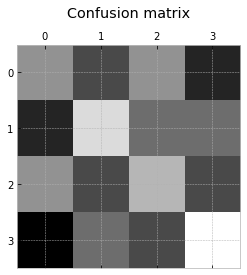

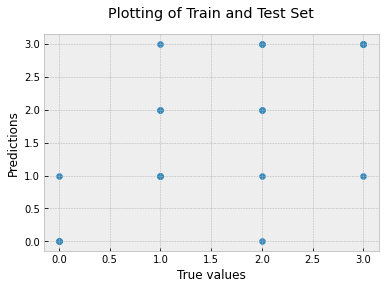

confusion matrix
[[4 2 4 1]
 [1 6 3 3]
 [4 2 5 2]
 [0 3 2 7]]
classification report
              precision    recall  f1-score   support

           0      0.750     0.750     0.750         4
           1      0.500     0.500     0.500         6
           2      0.500     0.333     0.400         6
           3      0.571     0.800     0.667         5

    accuracy                          0.571        21
   macro avg      0.580     0.596     0.579        21
weighted avg      0.565     0.571     0.559        21

roc_auc_score ovr 0.7623366013071896
SVM Classification Performance on the test set: Cross Validation Score = 0.4489


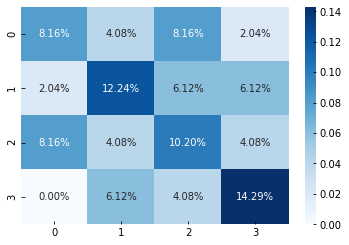

In [94]:

# SVM for multi-class classification using built-in one-vs-one
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

LR_clf= LogisticRegression(multi_class='ovr')
LR_clf_cross = fit_and_evaluate(LR_clf)


print('SVM Classification Performance on the test set: Cross Validation Score = %0.4f' % LR_clf_cross)


TODO

In [83]:
from sklearn.decomposition import PCA

In [84]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(dfX_t)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [86]:
newDataframe = pd.concat([principalDataframe, dfy],axis = 1)

Text(0, 0.5, 'PC2')

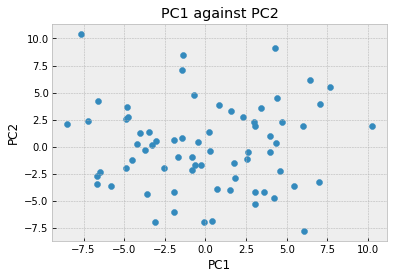

In [87]:
plt.scatter(principalDataframe.PC1, principalDataframe.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [88]:
dfy.groupby('target').count()

""
target
0
1
2
3


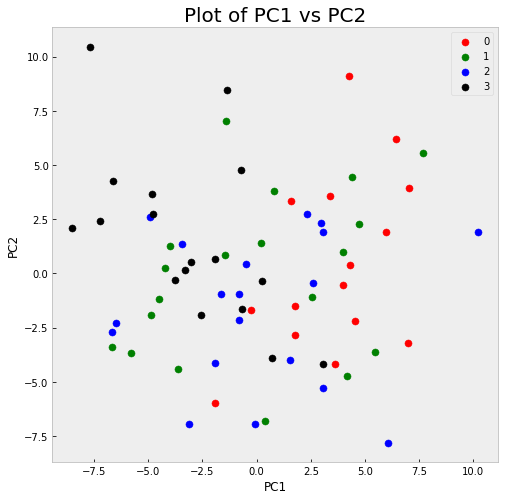

In [89]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = [0, 1, 2, 3]

colors = ['r', 'g', 'b', 'black']

for target, color in zip(targets,colors):
    indicesToKeep = newDataframe['target'] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC1']
               , newDataframe.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

In [ ]:
# logistic regression for multi-class classification using a one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model = LogisticRegression()
# define the ovr strategy
ovr = OneVsRestClassifier(model)
# fit model
ovr.fit(X_train, y_train)
# make predictions
yhat = ovr.predict(X_test)

In [ ]:
yhat

In [ ]:
# SVM for multi-class classification using built-in one-vs-one
from sklearn.datasets import make_classification
from sklearn.svm import SVC
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model = SVC(decision_function_shape='ovo')
# fit model
model.fit(X_train, y_train)
# make predictions
yhat = model.predict(X_test)